# What are the most demanded skills for the top 3 most popular data roles?

Methodology 

<ol style="list-style: none; padding-left: 1em;">
  <li>1- Clean-up skill column</li>
  <li>2- Claculate skill count based on I like <span style="background-color: #333; color: #bbb;">job_title_short</span>


 </li>
  <li>3- Claculate skill percentage<li>
  <li>4- Plot final findding</li>
</ol>

In [17]:
# Importing Libraries
import ast
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [18]:
df_US = df[df['job_country'] == 'United States']

In [19]:
df_skills = df_US.explode('job_skills')

In [20]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [21]:
# rurnning the series into a df

df_skills_count = df_skills_count.reset_index(name='skill_count')


In [22]:
df_skills_count 

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,38
1,airflow,Cloud Engineer,27
2,airflow,Data Analyst,387
3,airflow,Data Engineer,4716
4,airflow,Data Scientist,1166
...,...,...,...
1865,zoom,Machine Learning Engineer,5
1866,zoom,Senior Data Analyst,50
1867,zoom,Senior Data Engineer,30
1868,zoom,Senior Data Scientist,25


In [23]:
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [24]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [34]:
# Now we need to git the top 3 roles (without difine a list manually)

# So, gitting the unique values of job_title_short then turn these values inot list
job_titles = df_skills_count['job_title_short'].unique().tolist()

# Now we just want the top 3 job_title then after having then sort them in alphabetical order
job_titles =sorted(job_titles[:3])

job_titles


['Data Analyst', 'Data Engineer', 'Data Scientist']

In [88]:
df_US = df[df['job_country'] == 'United States']
df_skills = df_US.explode('job_skills')
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

print(job_titles)

df_skills_count


['Data Analyst', 'Data Engineer', 'Data Scientist']


,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


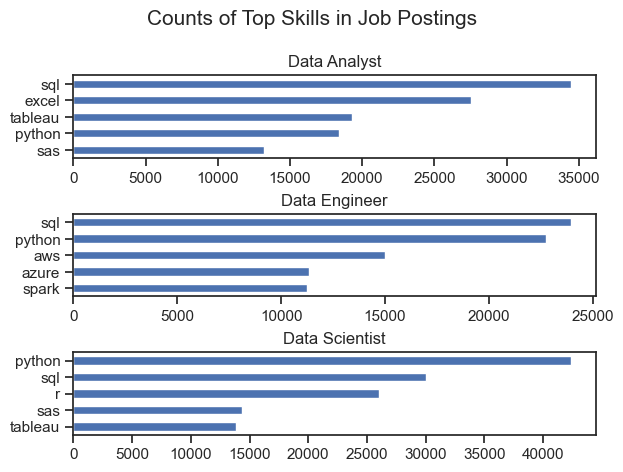

In [82]:
fig, ax=plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5) # .head(to get the top 5 values in each job_title)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # Fix the overlap and the font_size of the title in each barh
plt.show()



## Converting the counts in the x axis into percentage 

In [50]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [62]:
#- As we can see above we have each count for job posting with each skill but we want the each job posting for all it's skills 
df_US['job_title_short'].value_counts()

# Now we have series of each job posting with it's count but we want to turn this series into df and name the column of counts 'job_totals'
df_US['job_title_short'].value_counts().reset_index(name='job_total')

# Then reassign thsi df into a new one call 
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='job_total')

# Shwo result 
df_job_title_count


,job_title_short,job_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [63]:
# We want to calculate the precentage by dividing the job_total column on the skill_count
# to do this we need to put them both in one df (left merge so the first df will stay the same and the second one will be added) 
# So, we merge these two DataFrames --> df_skills_count & df_job_title_count into one df --> df_skills_perc

df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short') # merging on th job_title_short column

df_skills_perc

,job_skills,job_title_short,skill_count,job_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [ ]:
# Now we want to calculate the percentage by dividing the skil_count on the job_total 
# and save the result in a new clumn --> 'skill_percent'

df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['job_total'] # 100 * is to convert the perc from desimal to full value (for plotting)

df_skills_perc



,job_skills,job_title_short,skill_count,job_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407



- We need to convert the counts into a persentage 
- So, we have a skill_count for each of the different roles and job_skill

- what we need to do is performing an aggregation to get actually how many job postings we have for data Scientist, data enginner and data analyst and with this total number of job postings we take that skill_count divide by that total and get what's the percentage of a skill in a job posting
- % of skill in a job posting = (skill count in job postings) / (total count of job postings)

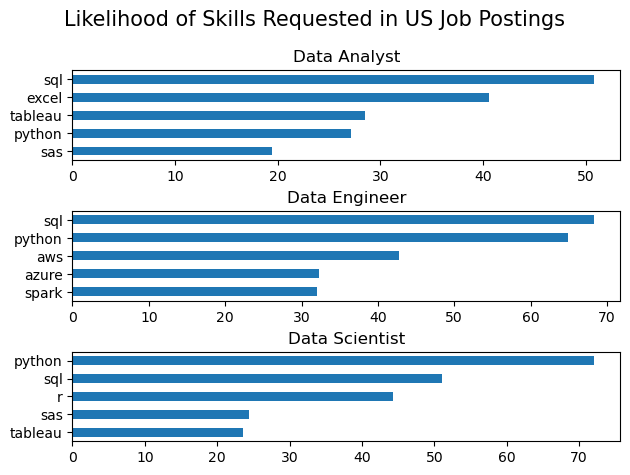

In [69]:
# Plotting using skill_percent instaid of skill_count

fig, ax=plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5) # .head(to get the top 5 values in each job_title)
    df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # Fix the overlap and the font_size of the title in each barh
plt.show()

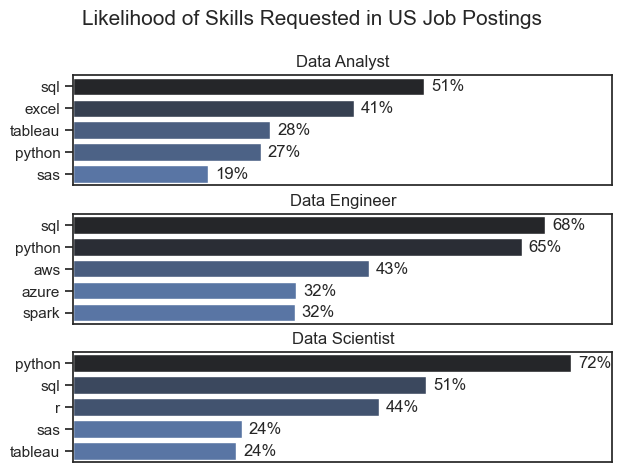

In [ ]:


fig, ax=plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5) 

    sns.set_theme(style='ticks')
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_percent', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('') 
    ax[i].set_xlabel('') 
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 78)

    ax[i].set_xticks([])

    for n, v in enumerate(df_plot['skill_percent']): 
        ax[i].text(v+1, n, f'{v:.0f}%', va='center')
       

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) 
plt.show()

In [92]:
df_plot

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
2,sql,Data Scientist,30034,58830,51.052184
4,r,Data Scientist,26022,58830,44.232534
10,sas,Data Scientist,14340,58830,24.375319
11,tableau,Data Scientist,13859,58830,23.557709
